In [111]:
from stravalib.client import Client
import webbrowser
import matplotlib.pyplot as plt
plt.style.use('bmh')

client_id, secret = open('client.secret').read().strip().split(',')
redirect_uri='http://localhost:8282/authorized'
scope = "activity:read_all"

auth_url = "https://www.strava.com/oauth/authorize?client_id={}&response_type=code&redirect_uri={}&scope={}".format(client_id,redirect_uri,scope)




In [64]:
print auth_url

https://www.strava.com/oauth/authorize?client_id=23579&response_type=code&redirect_uri=http://localhost:8282/authorized&scope=activity:read_all


In [69]:
webbrowser.open(auth_url)
code='ab85a7743405b7b7036125d98d164ade2f70b1d4'

In [70]:
access_token = client.exchange_code_for_token(client_id=client_id,
                                             client_secret=secret,
                                             code=code)

In [76]:
client = Client(access_token=access_token)
tst = client.get_activities() # Get current athlete details

In [78]:
for i in tst:
    print i

<Activity id=3323103115 name=u"T's Brick Run" resource_state=2>
<Activity id=3317483312 name=u'Group Workout: Lazy Mountain' resource_state=2>
<Activity id=3313706686 name=u'Afternoon Run' resource_state=2>
<Activity id=3309205763 name=u'Pettit +1' resource_state=2>
<Activity id=3268435703 name=u'Afternoon Run' resource_state=2>
<Activity id=3259587461 name=u'Lunch Activity' resource_state=2>
<Activity id=3239124145 name=u'Elephants -2' resource_state=2>
<Activity id=3239054586 name=u'Elephants -2' resource_state=2>
<Activity id=3228574902 name=u'Quick Brick.' resource_state=2>
<Activity id=3228260754 name=u'Avalanche Spire' resource_state=2>
<Activity id=3225095348 name=u'Afternoon Yog' resource_state=2>
<Activity id=3222040205 name=u'Emerald -3' resource_state=2>
<Activity id=3218239322 name=u'Baird -3' resource_state=2>
<Activity id=3214768487 name=u'Afternoon Hike' resource_state=2>
<Activity id=3208559675 name=u'Berryessa' resource_state=2>
<Activity id=3204797518 name=u'Baxter' r

<Activity id=2763047589 name=u'Afternoon Run' resource_state=2>
<Activity id=2760616526 name=u'Afternoon Swim' resource_state=2>
<Activity id=2760304857 name=u'The cold brew commute.' resource_state=2>
<Activity id=2758395092 name=u'Bald Knob' resource_state=2>
<Activity id=2755920596 name=u'Megantic +2' resource_state=2>
<Activity id=2755857962 name=u'Megantic +2' resource_state=2>
<Activity id=2749884514 name=u'Still trying to figure out the fells...' resource_state=2>
<Activity id=2747496672 name=u'A whole lot of nopes, one save and one spill' resource_state=2>
<Activity id=2746948335 name=u'Morning Ride' resource_state=2>
<Activity id=2741599082 name=u'Lunch Swim' resource_state=2>
<Activity id=2740210813 name=u'Mokelumne' resource_state=2>
<Activity id=2738552397 name=u'Crane +1' resource_state=2>
<Activity id=2731473669 name=u'Striped' resource_state=2>
<Activity id=2723657686 name=u'Evening Run' resource_state=2>
<Activity id=2723647918 name=u'Afternoon Run' resource_state=2>
<A

<Activity id=1995033824 name=u'Kaweah' resource_state=2>
<Activity id=1994949079 name=u'Ebbetts' resource_state=2>
<Activity id=1990435208 name=u'Night Run' resource_state=2>
<Activity id=1986921579 name=u'Geiger' resource_state=2>
<Activity id=1985309597 name=u'Evening Run' resource_state=2>
<Activity id=1984485859 name=u'Morning Swim' resource_state=2>
<Activity id=1982452899 name=u'Ride On With Type 1 Social Ride (D)' resource_state=2>
<Activity id=1980714297 name=u'Lunch Run' resource_state=2>
<Activity id=1978687354 name=u'Turkey Freeze w T.' resource_state=2>
<Activity id=1978624073 name=u'Not warm warm up' resource_state=2>
<Activity id=1977982340 name=u'Bald Knob' resource_state=2>
<Activity id=1976236583 name=u'Goddard' resource_state=2>
<Activity id=1972913629 name=u'Afternoon Run' resource_state=2>
<Activity id=1970582963 name=u'Carson' resource_state=2>
<Activity id=1968405558 name=u'Afternoon Swim' resource_state=2>
<Activity id=1965273438 name=u'Evening Run' resource_stat

<Activity id=1482467440 name=u'WU + 90sec hill reps + WD' resource_state=2>
<Activity id=1481947101 name=u'150 min tempo' resource_state=2>
<Activity id=1476939695 name=u'~1mi' resource_state=2>
<Activity id=1476228734 name=u"Jon's Short Mix" resource_state=2>
<Activity id=1475439986 name=u'3mi w T' resource_state=2>
<Activity id=1471645629 name=u'Dreadmill + some arms for good measure' resource_state=2>
<Activity id=1469799788 name=u'Over/Unders' resource_state=2>
<Activity id=1468156144 name=u'SST Intervals' resource_state=2>
<Activity id=1466305160 name=u'1 mi @ tempo' resource_state=2>
<Activity id=1463290276 name=u'SST - Short' resource_state=2>
<Activity id=1461749757 name=u'Evening Run' resource_state=2>
<Activity id=1461749678 name=u'CR: Extremely Broken Tempo Run' resource_state=2>
<Activity id=1461749565 name=u'CR: Broken Tempo Run' resource_state=2>
<Activity id=1461749424 name=u'Indoor Warmup' resource_state=2>
<Activity id=1456492924 name=u'Afternoon Run' resource_state=2>

<Activity id=1084662329 name=u'Lunch Run' resource_state=2>
<Activity id=1084662236 name=u'Got dropped and then lost.' resource_state=2>
<Activity id=1084603302 name=u'Quarter mile strugglefest' resource_state=2>
<Activity id=1083002659 name=u'1200 yards' resource_state=2>
<Activity id=1077398601 name=u'~1400 yards' resource_state=2>
<Activity id=1075761722 name=u'Cruise from work home in busy minute man' resource_state=2>
<Activity id=1075296950 name=u'Cruise to work to wrap up thesis' resource_state=2>
<Activity id=1073356882 name=u'TriFury Tri Run' resource_state=2>
<Activity id=1073356782 name=u'TriFury Tri Bike' resource_state=2>
<Activity id=1073356347 name=u'Crappy swim' resource_state=2>
<Activity id=1072514293 name=u'645 yards' resource_state=2>
<Activity id=1069554395 name=u'I lost count. Close to 1700 yards' resource_state=2>
<Activity id=1068060333 name=u'Brick B' resource_state=2>
<Activity id=1068060313 name=u'Brick A' resource_state=2>
<Activity id=1062587961 name=u'Hot 

In [114]:
tmp_0 = client.get_activity_streams(3317483312,types=['heartrate'])

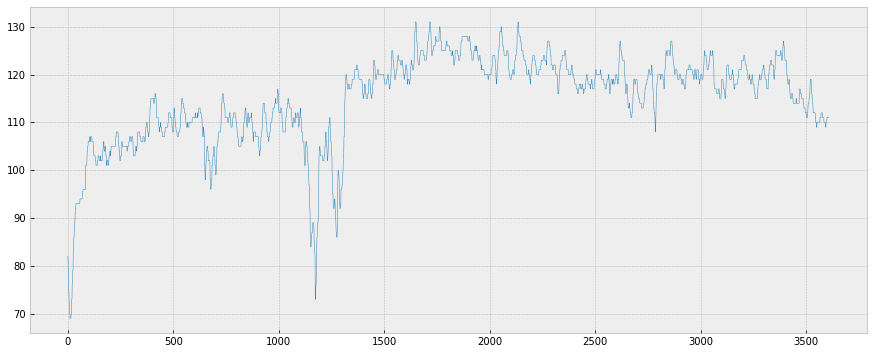

In [116]:
fig = plt.figure(figsize=(15,6))
plt.plot(tmp_0['heartrate'].data, linewidth=.5)

In [117]:
tmp_0

{u'distance': <Stream type=distance resolution=high original_size=3607>,
 u'heartrate': <Stream type=heartrate resolution=high original_size=3607>}